🌫🛸


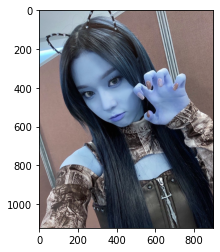

In [1]:
import os  # 디렉토리의 사진 활용
import cv2 # cv활용
import matplotlib.pyplot as plt #매트랩활용
import numpy as np #배열계산 활용
import dlib # HOG(색상 변화량)를 사용해 랜드마크 찾는 기계학습 알고리즘?
print("🌫🛸")


my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/IMG_6880.jpg'
# 디렉토리의 이미지를 가져온다
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

In [2]:
detector_hog = dlib.get_frontal_face_detector() #hog를 선언하여 사용할준비

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #BRG to RGB 변환
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(205, 313) (526, 634)]]


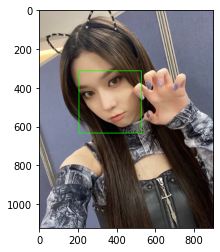

In [3]:
print(dlib_rects)   

for dlib_rect in dlib_rects: #사각형의 박스의 좌표
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    # 얼굴있는 부분 박스와 좌표 보여주기
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) #BRG to RGB 변환
plt.imshow(img_show_rgb)
plt.show()

In [4]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

#지정한 hape_predictor_68_face_landmarks.dat 모델을 불러온다.

In [5]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


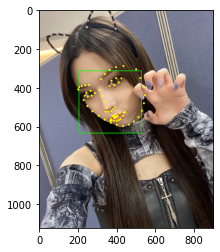

In [6]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] + dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(348, 504)
(x,y) : (348,665)
(w,h) : (322,322)


In [8]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(322, 322, 3)


In [9]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) 
# 스티커 추가를위한 시작점에서의 좌표 조정

(x,y) : (187,343)


In [10]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
# 이미지가 범위를 벗어나는 부분 잘라서 예외처리 해줌

(x,y) : (187,343)


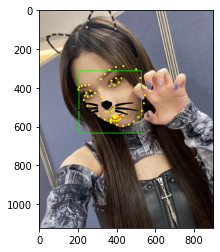

In [11]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식
#sticker_area은 원본 이미지에서 스티커를 적용할 위치를 crop한 이미지
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

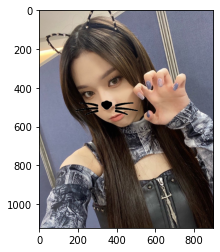

In [12]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()
# bounding box와 landmark를 제거하고 최종 결과만 출력